In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import folium
from folium import plugins
# from matplotlib.widgets import Slider

# %matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (6,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [13]:
df = pd.read_csv('/Users/mahmooooodie/Downloads/Mental health Depression disorder Data.csv')
df.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [14]:
df.shape

(108553, 11)

In [16]:
max_index = df.index.max()
df.drop(range(6356, max_index + 1), inplace = True)

In [28]:
df.drop(columns = 'index', inplace = True)

In [29]:
df.corr().T

,Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
Anxiety disorders (%),1.000000,0.615089,0.376575,-0.134188
Drug use disorders (%),0.615089,1.000000,0.365259,-0.109752
Depression (%),0.376575,0.365259,1.000000,0.053805
Alcohol use disorders (%),-0.134188,-0.109752,0.053805,1.000000


In [33]:
df.drop(columns = 'Code', inplace = True)

In [35]:
df.columns

Index(['Entity', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)'],
      dtype='object')

In [84]:
df.country

0                      Afghanistan
1                      Afghanistan
2                      Afghanistan
3                      Afghanistan
4                      Afghanistan
                   ...            
6351    Western Sub-Saharan Africa
6352    Western Sub-Saharan Africa
6353    Western Sub-Saharan Africa
6354    Western Sub-Saharan Africa
6355    Western Sub-Saharan Africa
Name: country, Length: 6356, dtype: object

In [32]:
df.shape

(6356, 10)

In [40]:
new_columns = {
    '':'country',
    'Schizophrenia (%)':'schizophrenia',
    'Bipolar disorder (%)':'bipolar',
    'Eating disorders (%)':'eating',
    'Anxiety disorders (%)':'anxiety',
    'Drug use disorders (%)':'drugs',
    'Depression (%)':'depression',
    'Alcohol use disorders (%)':'alcohol',
    'Year':'year'
}
df.rename(columns = new_columns, inplace = True)

In [41]:
df

,country,year,schizophrenia,bipolar,eating,anxiety,drugs,depression,alcohol
0,Afghanistan,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...
6351,Western Sub-Saharan Africa,2013,0.173905,0.635737,0.136469,2.899641,0.477964,3.805780,0.966526
6352,Western Sub-Saharan Africa,2014,0.174254,0.636185,0.138116,2.902038,0.480415,3.787750,0.967383
6353,Western Sub-Saharan Africa,2015,0.174616,0.636682,0.139784,2.904311,0.482921,3.762850,0.968057
6354,Western Sub-Saharan Africa,2016,0.17498,0.637211,0.141193,2.906350,0.485547,3.733871,0.968472


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6356 entries, 0 to 6355
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        6356 non-null   object 
 1   year           6356 non-null   object 
 2   schizophrenia  6356 non-null   object 
 3   bipolar        6356 non-null   object 
 4   eating         6356 non-null   object 
 5   anxiety        6356 non-null   float64
 6   drugs          6356 non-null   float64
 7   depression     6356 non-null   float64
 8   alcohol        6356 non-null   float64
dtypes: float64(4), object(5)
memory usage: 447.0+ KB


In [43]:
df["year"] = df["year"].astype("int64")
df["schizophrenia"] = df["schizophrenia"].astype("float64")
df["bipolar"] = df["bipolar"].astype("float64")
df["eating"] = df["eating"].astype("float64")
df.dtypes


country           object
year               int64
schizophrenia    float64
bipolar          float64
eating           float64
anxiety          float64
drugs            float64
depression       float64
alcohol          float64
dtype: object

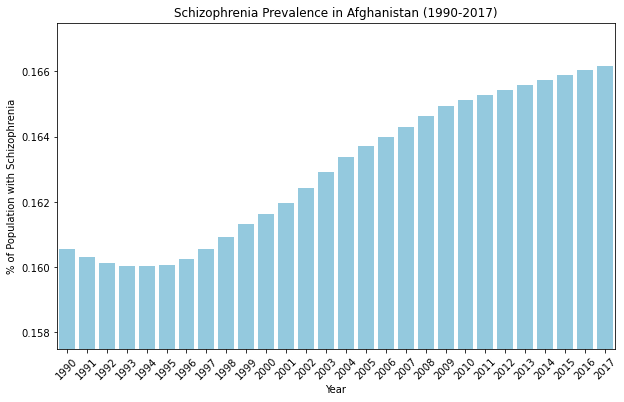

In [50]:
afghanistan_data = df[(df['country'] == 'Afghanistan')]
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='year', y='schizophrenia', data=afghanistan_data, color='skyblue')
plt.xlabel('Year')
plt.ylabel('% of Population with Schizophrenia')
plt.title('Schizophrenia Prevalence in Afghanistan (1990-2017)')
plt.ylim(0.1575, 0.1675)
plt.xticks(rotation=45);

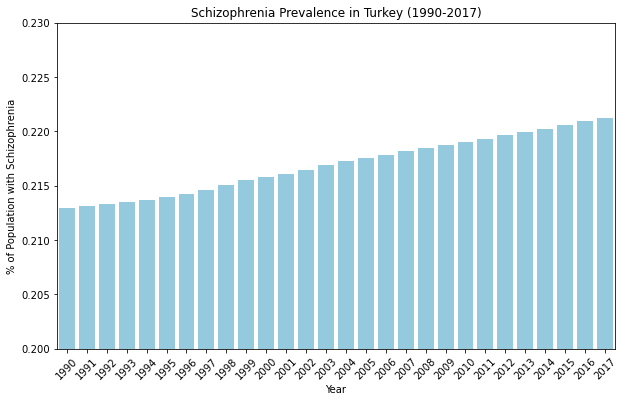

In [55]:
turkey_data = df[(df['country'] == 'Turkey')]
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='schizophrenia', data=turkey_data, color='skyblue')
plt.xlabel('Year')
plt.ylabel('% of Population with Schizophrenia')
plt.title('Schizophrenia Prevalence in Turkey (1990-2017)')

plt.xticks(rotation=45);

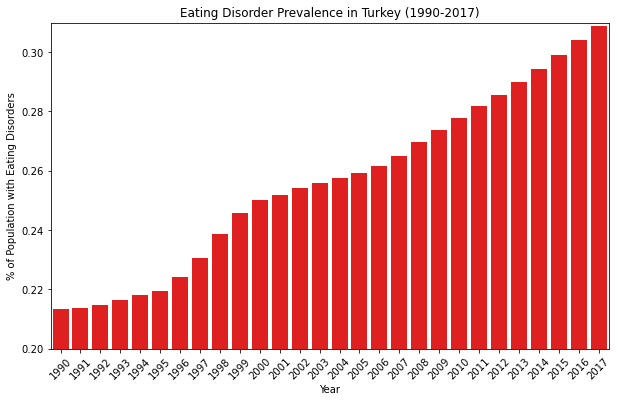

In [57]:
turkey_data = df[(df['country'] == 'Turkey')]
plt.figure(figsize=(10, 6))  
sns.barplot(x='year', y='eating', data=turkey_data, color='red')
plt.xlabel('Year')
plt.ylabel('% of Population with Eating Disorders')
plt.title('Eating Disorder Prevalence in Turkey (1990-2017)')
plt.ylim(0.2,0.31)
plt.xticks(rotation=45);

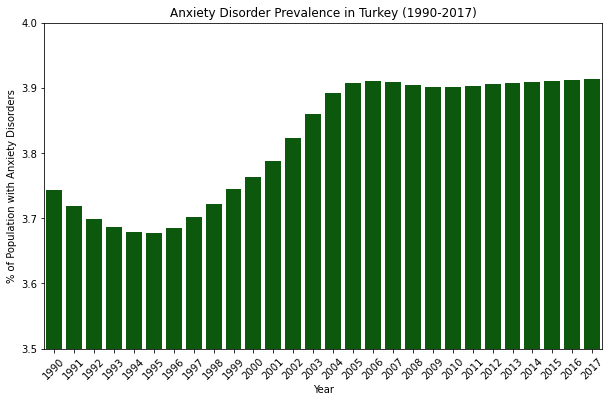

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='anxiety', data=turkey_data, color='darkgreen')
plt.xlabel('Year')
plt.ylabel('% of Population with Anxiety Disorders')
plt.title('Anxiety Disorder Prevalence in Turkey (1990-2017)')
plt.ylim(3.5,4)
plt.xticks(rotation=45);

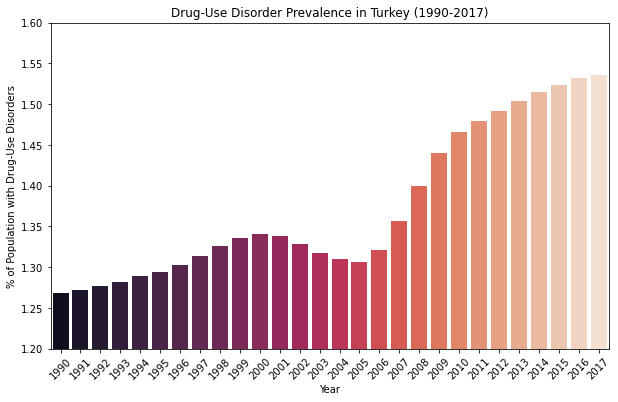

In [62]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x='year', y='drugs', data=turkey_data, palette='rocket')
plt.xlabel('Year')
plt.ylabel('% of Population with Drug-Use Disorders')
plt.title('Drug-Use Disorder Prevalence in Turkey (1990-2017)')
plt.ylim(1.2,1.6)
plt.xticks(rotation=45);

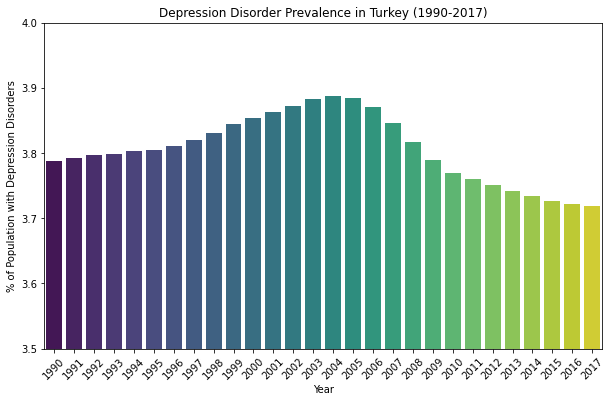

In [64]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='year', y='depression', data=turkey_data, palette='viridis')
plt.xlabel('Year')
plt.ylabel('% of Population with Depression Disorders')
plt.title('Depression Disorder Prevalence in Turkey (1990-2017)')
plt.ylim(3.5,4)
plt.xticks(rotation=45);

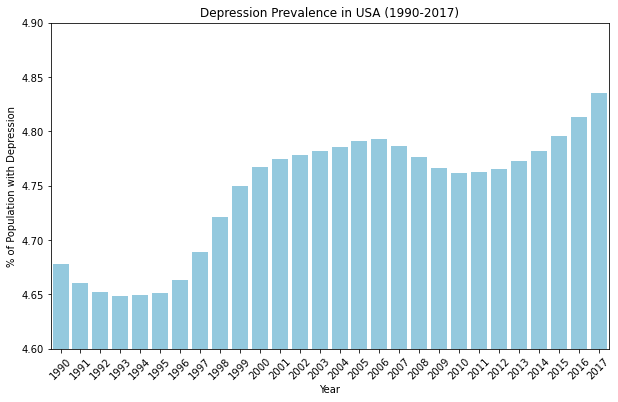

In [89]:
usa_data = df[(df['country'] == 'United States')]
plt.figure(figsize=(10, 6)) 
sns.barplot(x='year', y='depression', data=usa_data, color='skyblue')
plt.xlabel('Year')
plt.ylabel('% of Population with Depression')
plt.title('Depression Prevalence in USA (1990-2017)')
plt.ylim(4.6,4.9)
plt.xticks(rotation=45);

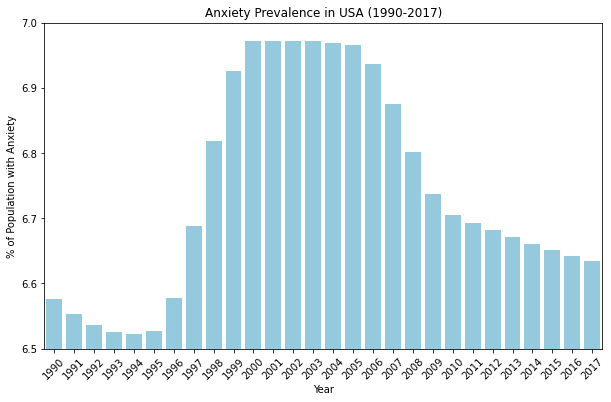

In [92]:
usa_data = df[(df['country'] == 'United States')]
plt.figure(figsize=(10, 6)) 
sns.barplot(x='year', y='anxiety', data=usa_data, color='skyblue')
plt.xlabel('Year')
plt.ylabel('% of Population with Anxiety')
plt.title('Anxiety Prevalence in USA (1990-2017)')
plt.ylim(6.5,7)
plt.xticks(rotation=45);

In [93]:
import missingno as msno

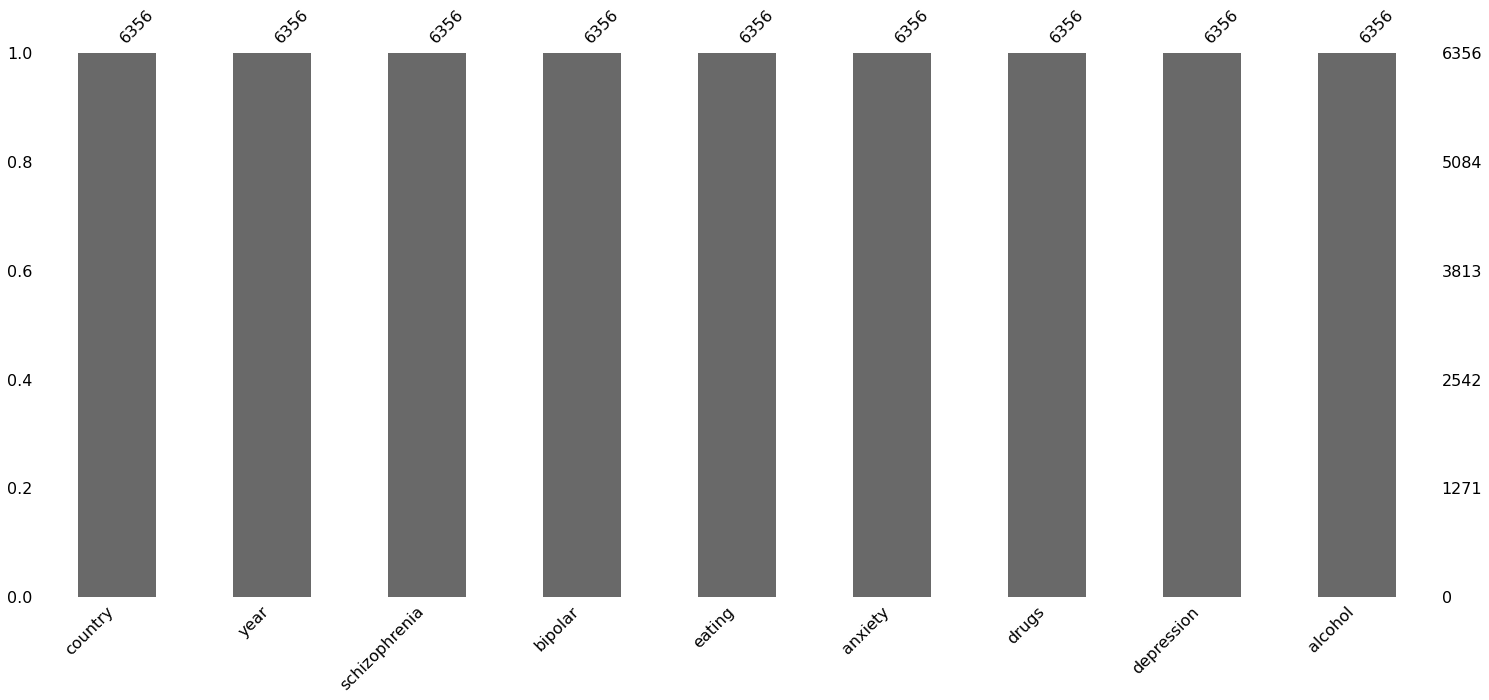

In [96]:
msno.bar(df);

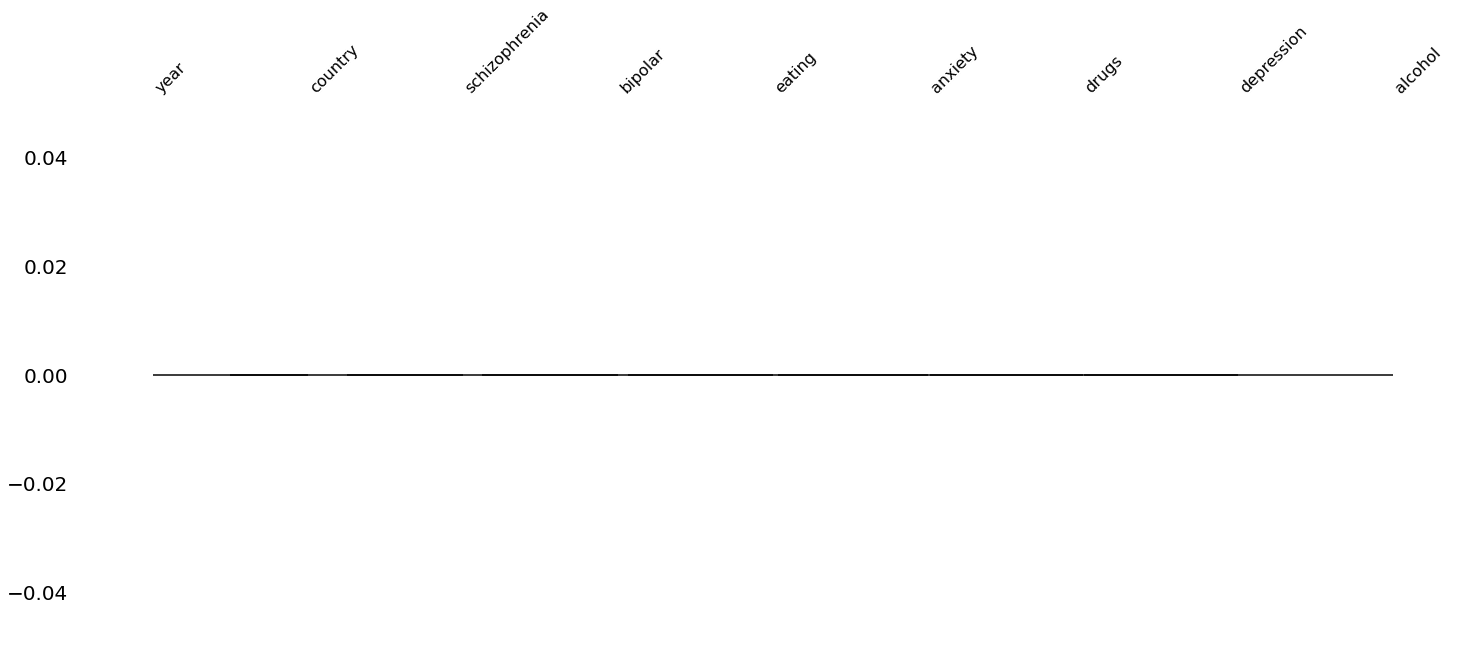

In [99]:
not msno.dendrogram(df);

In [103]:
usa_data.describe()

,year,schizophrenia,bipolar,eating,anxiety,drugs,depression,alcohol
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2003.500000,0.338117,0.653710,0.513658,6.741584,2.844713,4.744655,2.046643
std,8.225975,0.002424,0.001028,0.020454,0.165191,0.327117,0.057619,0.040801
min,1990.000000,0.333890,0.651236,0.468676,6.522278,2.339515,4.648701,1.998437
25%,1996.750000,0.336120,0.653187,0.500358,6.620797,2.537455,4.686263,2.022636
50%,2003.500000,0.337639,0.654143,0.520208,6.691116,2.964724,4.766471,2.039057
75%,2010.250000,0.340608,0.654434,0.531246,6.929023,3.002382,4.782974,2.060736
max,2017.000000,0.341535,0.654749,0.534175,6.971995,3.452476,4.835610,2.173751
